In [ ]:
!pip install burr[start]

# Streaming applications

This shows how one goes about working with a streaming response with Burr, using FastAPI.
The code for implementation is in [application.py](application.py).

This notebook only shows the streaming side. To check out FastAPI in Burr, check out
- The [Burr code](./application.py) -- imported and used here
- The [backend FastAPI server](./server.py) for the streaming output using SSE
- The [frontend typescript code](https://github.com/dagworks-inc/burr/blob/main/telemetry/ui/src/examples/StreamingChatbot.tsx) that renders and interacts with the stream

You can view this demo in your app by running Burr:

```bash
burr 
```

This will open a browser on [http://localhost:7241](http://localhost:7241)

Then navigate to the [streaming example](http://localhost:7241/demos/streaming-chatbot).

In [18]:
from application import application as streaming_application
from application import TERMINAL_ACTIONS
import pprint

# The application

The application we created will be a simple chatbot proxy. It has a few diffrent modes -- it can either decide a prompt is "unsafe" (in this case meaning that it has the word "unsafe" in it, but this would typically go to specific model),
or do one of the following:

1. Generate code
2. Answer a question
3. Generate a poem
4. Prompt for more

It will use an LLM to decide which to do. It streams back text using async streaming in Burr. Read more about how that is implemented [here](https://burr.dagworks.io/concepts/streaming-actions/).

Note that, even though not every response is streaming (E.G. unsafe response, which is hardcoded), they are modeled as streaming to make interaction with the app simpler.

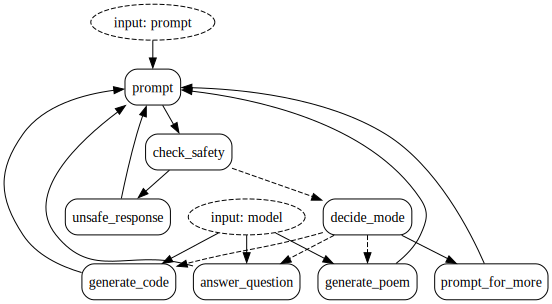

In [7]:
app = streaming_application()
app.visualize()

# Calling the application

With async streaming, we get back an `AsyncStreamingResultContainer`. This allows us to get partial results streaming in, while also allowing us to get the full result.
In the following case, we just 

In [19]:
action, streaming_container = await app.astream_result(
    halt_after=TERMINAL_ACTIONS, inputs={"prompt": "Please generate a limerick about Alexander Hamilton and Aaron Burr"}
)
# Stream results in
async for item in streaming_container:
    print(item['delta'], end="")

# Or just get the final result
result, state = await streaming_container.get()
print("\n")
pprint.pprint(result)

Alexander and Aaron, a duo renowned,
Their story in history forever bound,
In a duel they met,
A fate they couldn't forget,
A tragic end to a rivalry unsewn, unground.

{'response': {'content': 'Alexander and Aaron, a duo renowned,\n'
                         'Their story in history forever bound,\n'
                         'In a duel they met,\n'
                         "A fate they couldn't forget,\n"
                         'A tragic end to a rivalry unsewn, unground.',
              'role': 'assistant',
              'type': 'text'}}
